# La Propagation de Pertinence par Couche (Layer- wise Relevance Propagation,LRP) - Projet 5

Van Duy Le / Radja Djihane Elmiri

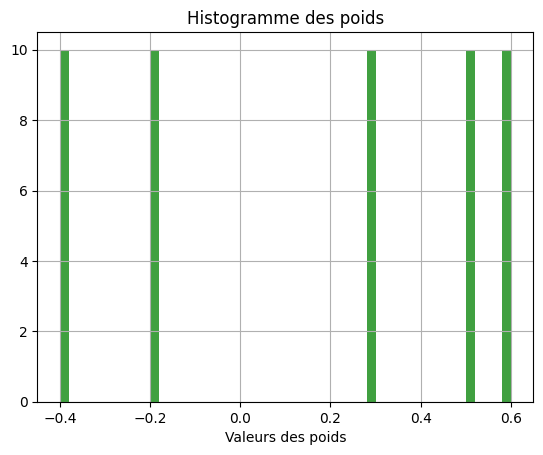

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

# Nouvelles valeurs pour les entrées et les poids
x_i_dict = {'x_1': 5, 'x_2': -3, 'x_3': 8}

w_j_1_dict = {'w_i1_j1': 0.1, 'w_i2_j1': -0.4, 'w_i3_j1': 0.6}
w_j_2_dict = {'w_i1_j2': -0.3, 'w_i2_j2': 0.2, 'w_i3_j2': -0.5}
w_j_3_dict = {'w_i1_j3': 0.4, 'w_i2_j3': 0.1, 'w_i3_j3': -0.2}
w_j_4_dict = {'w_i1_j4': -0.6, 'w_i2_j4': 0.7, 'w_i3_j4': 0.3}
w_j_5_dict = {'w_i1_j5': 0.2, 'w_i2_j5': -0.1, 'w_i3_j5': 0.4}

w_k_dict = {'w_j1_k1': 0.5, 'w_j2_k1': -0.2, 'w_j3_k1': 0.3, 'w_j4_k1': 0.6, 'w_j5_k1': -0.4}

# Histogramme des poids
plt.hist(w_k_dict.values(), 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Valeurs des poids')
plt.title('Histogramme des poids')
plt.grid(True)
plt.show()

In [ ]:
# Calcul de la passe feedforward
sums = {}
for j, w_dict in enumerate([w_j_1_dict, w_j_2_dict, w_j_3_dict, w_j_4_dict, w_j_5_dict], start=1):
    sums[f'sum_j{j}'] = sum(x_i_dict[f'x_{i+1}'] * w for i, w in enumerate(w_dict.values()))

# Application de ReLU
vals = {k: max(0, v) for k, v in sums.items()}

# Calcul de la sortie du réseau
val_k1 = sum(vals.values())
print(f"Valeur de sortie du réseau: {val_k1}")


Valeur de sortie du réseau: 11.1


In [ ]:
# Calcul des pertinences des couches
R_k = val_k1
R_j = {k: v for k, v in vals.items()}
R_i = {}

for i in range(3):
    R_i[f'R_i{i+1}'] = sum((w_dict[f'w_i{i+1}_j{j+1}'] ** 2 / sum(w ** 2 for w in w_dict.values())) * R_j[f'sum_j{j+1}']
                            for j, w_dict in enumerate([w_j_1_dict, w_j_2_dict, w_j_3_dict, w_j_4_dict, w_j_5_dict]))

print(f"Pertinences des neurones de la couche i: {R_i}")


Pertinences des neurones de la couche i: {'R_i1': 1.0559748427672955, 'R_i2': 2.1813117699910154, 'R_i3': 7.862713387241689}


In [ ]:
# Vérification de la positivité
def check_positivity():
    assert R_k >= 0, "Relevance of every neuron of every layer must be positive"
    for r in R_j.values():
        assert r >= 0, "Relevance of every neuron of every layer must be positive"
    for r in R_i.values():
        assert r >= 0, "Relevance of every neuron of every layer must be positive"
    print("Positivity check passed.")

check_positivity()

Positivity check passed.


In [ ]:
# Vérification de la conservativité
def check_conservativity():
    sum_Rj = sum(R_j.values())
    sum_Ri = sum(R_i.values())
    print(f"Conservativity j --to--> k: sum_Rj: {sum_Rj}, R_k: {R_k}")
    print(f"Conservativity i --to--> j: sum_Ri: {sum_Ri}, sum_Rj: {sum_Rj}")
    assert np.isclose(sum_Rj, R_k), "Conservativity property violated at j --to--> k"
    assert np.isclose(sum_Ri, sum_Rj), "Conservativity property violated at i --to--> j"
    print("Conservativity check passed.")

check_conservativity()

Conservativity j --to--> k: sum_Rj: 11.1, R_k: 11.1
Conservativity i --to--> j: sum_Ri: 11.1, sum_Rj: 11.1
Conservativity check passed.


In [ ]:
# Tests unitaires
class TestLRPProperties(unittest.TestCase):
    def test_relevance_positivity(self):
        check_positivity()

    def test_relevance_conservativity(self):
        check_conservativity()

unittest.main(argv=[''], verbosity=2, exit=False)

test_relevance_conservativity (__main__.TestLRPProperties.test_relevance_conservativity) ... ok
test_relevance_positivity (__main__.TestLRPProperties.test_relevance_positivity) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.006s

OK


Conservativity j --to--> k: sum_Rj: 11.1, R_k: 11.1
Conservativity i --to--> j: sum_Ri: 11.1, sum_Rj: 11.1
Conservativity check passed.
Positivity check passed.
